In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

In [2]:
fraud_data=pd.read_csv('Fraud_check.csv')

In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

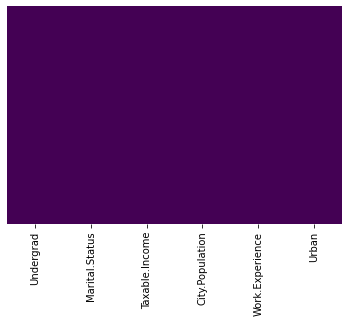

In [6]:
sns.heatmap(fraud_data.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [7]:
fraud_data[fraud_data.duplicated()].shape

(0, 6)

In [8]:
## There are no duplicate and null values in our data

## Descriptive analysis

In [9]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Data visualization

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

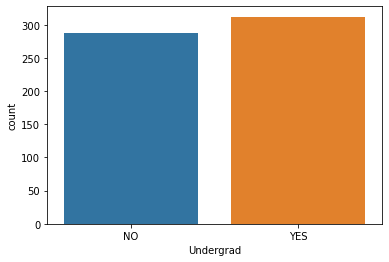

In [10]:
sns.countplot(x=fraud_data['Undergrad'])

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

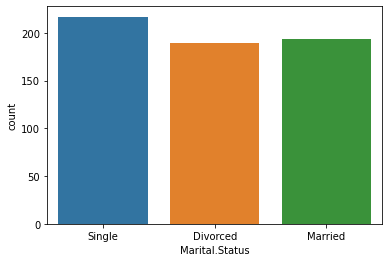

In [11]:
sns.countplot(x=fraud_data['Marital.Status'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

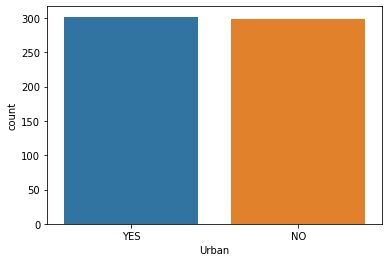

In [12]:
sns.countplot(x=fraud_data['Urban'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

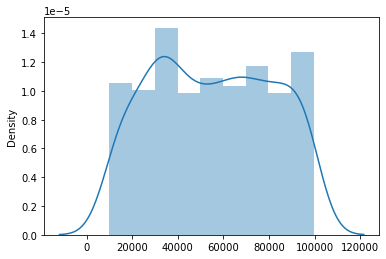

In [13]:
sns.distplot(x=fraud_data['Taxable.Income'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

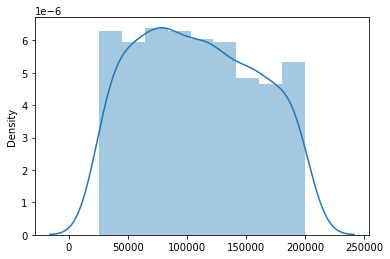

In [14]:
sns.distplot(x=fraud_data['City.Population'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

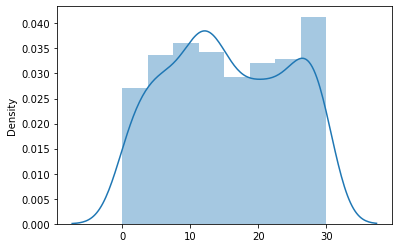

In [15]:
sns.distplot(x=fraud_data['Work.Experience'])

<AxesSubplot:xlabel='Taxable.Income'>

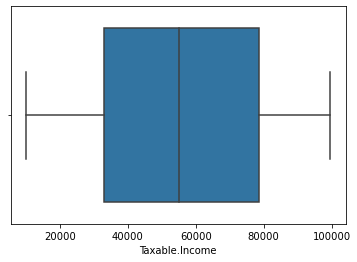

In [16]:
sns.boxplot(x=fraud_data['Taxable.Income'])

<AxesSubplot:xlabel='City.Population'>

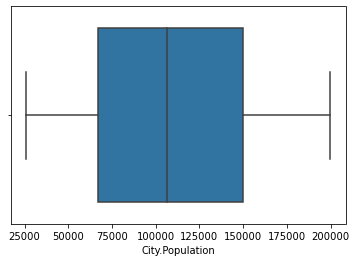

In [17]:
sns.boxplot(x=fraud_data['City.Population'])

<AxesSubplot:xlabel='Work.Experience'>

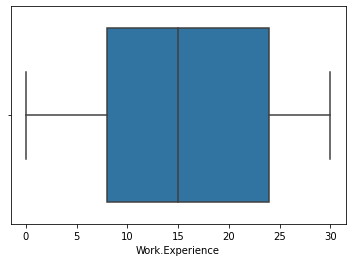

In [18]:
sns.boxplot(x=fraud_data['Work.Experience'])

In [19]:
## No outliers in Data

## Converting Target Variable into Categorical

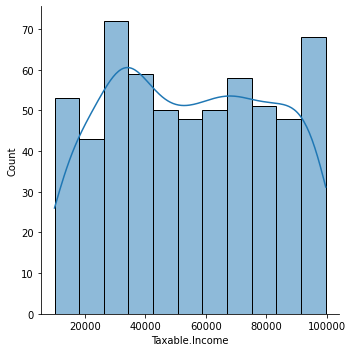

In [20]:
sns.displot(fraud_data['Taxable.Income'],kde=True)

In [21]:
fraud_data['Taxable.Income'].max()

99619

In [22]:
fraud_data['Tax_Cat']=pd.cut(x=fraud_data['Taxable.Income'],
                             bins=[0,30000,100000],
                             labels=['Risky','Good'],right=False)
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [23]:
fraud_data['Tax_Cat'].value_counts()

Good     476
Risky    124
Name: Tax_Cat, dtype: int64

In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
 6   Tax_Cat          600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [25]:
def getValue_Counts(data):
    for col in data.columns:
        if data[col].dtype=='object':
            print(data[col].value_counts())
            
getValue_Counts(fraud_data)            

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


In [26]:
categorical_col=fraud_data.select_dtypes(exclude='number')
categorical_col

,Undergrad,Marital.Status,Urban,Tax_Cat
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good
...,...,...,...,...
595,YES,Divorced,YES,Good
596,YES,Divorced,YES,Good
597,NO,Divorced,YES,Good
598,YES,Married,NO,Good


In [27]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [28]:
fraud_data1=fraud_data.drop(columns=['Taxable.Income'],axis=1)
fraud_data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Cat
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


## Using Encoding Techniques to convert Categorical Columns to Numerical

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_enc=LabelEncoder()

In [31]:
fraud_data1['Undergrad']=label_enc.fit_transform(fraud_data1['Undergrad'])
fraud_data1['Marital.Status']=label_enc.fit_transform(fraud_data1['Marital.Status'])
fraud_data1['Urban']=label_enc.fit_transform(fraud_data1['Urban'])
fraud_data1['Tax_Cat']=label_enc.fit_transform(fraud_data1['Tax_Cat'])

In [32]:
fraud_data1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [33]:
fraud_data1['Tax_Cat'].value_counts()

0    476
1    124
Name: Tax_Cat, dtype: int64

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

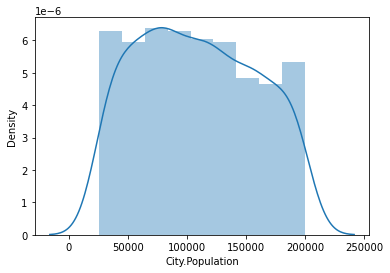

In [34]:
sns.distplot(fraud_data1['City.Population'])

In [35]:
fraud_data1['Tax_Cat'].value_counts()

0    476
1    124
Name: Tax_Cat, dtype: int64

In [36]:
X=fraud_data1.iloc[:,:-1]
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [37]:
Y=fraud_data1['Tax_Cat']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Cat, dtype: int32

<AxesSubplot:xlabel='Tax_Cat', ylabel='count'>

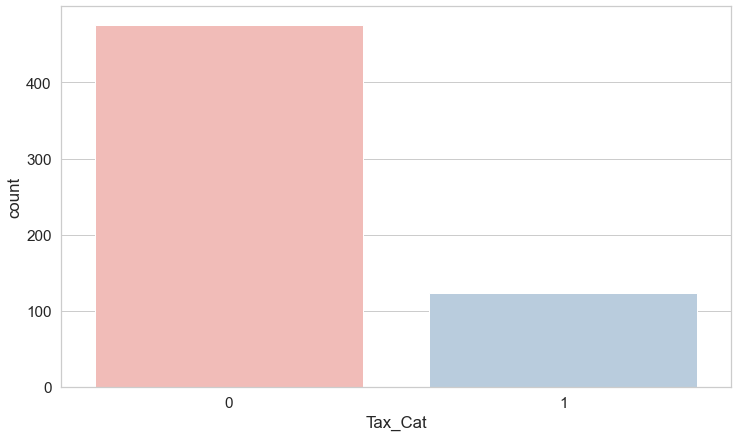

In [38]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Tax_Cat', data = fraud_data1, palette = 'Pastel1')

## Model Building

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.2,random_state=0)

In [41]:
X_train.shape

(480, 5)

In [42]:
X_test.shape

(120, 5)

## Using Decision Tree Classifier

In [43]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Calculating Train and Test Accuracy

In [44]:
preds_y_train=clf.predict(X_train)
pd.Series(preds_y_train).value_counts()

0    477
1      3
dtype: int64

In [45]:
pd.crosstab(Y_train,preds_y_train)

col_0,0,1
Tax_Cat,,
0,381,0
1,96,3


In [46]:
accuracy_dt=accuracy_score(Y_train,preds_y_train)
accuracy_dt

0.8

In [47]:
preds_y_test=clf.predict(X_test)


In [48]:
pd.crosstab(Y_test,preds_y_test)

col_0,0,1
Tax_Cat,,
0,94,1
1,25,0


In [49]:
accuracy_dt_test=accuracy_score(Y_test,preds_y_test)
accuracy_dt_test

0.7833333333333333

In [50]:
## We can see there is no overfitting problem here

In [51]:
print(classification_report(Y_test,preds_y_test))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



## Resampling the data

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm=SMOTE(sampling_strategy='not majority',random_state=42)

In [54]:
x_resample,y_resample=sm.fit_resample(X,Y)


In [55]:
y_df=pd.DataFrame(y_resample)

In [56]:
y_df

,Tax_Cat
0,0
1,0
2,0
3,0
4,0
...,...
947,1
948,1
949,1
950,1


In [57]:
x_resample

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
947,0,1,131067,16,1
948,0,2,102459,18,0
949,0,2,124986,18,1
950,0,1,91873,15,0


In [58]:
y_df.value_counts()

Tax_Cat
0          476
1          476
dtype: int64

In [59]:
## Our Data is resampled now as we can see equal count for both Good and Risky

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(x_resample,y_resample,
                                               test_size=0.3,random_state=0)

## Building Decision Tree on Balanced Data

In [61]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [62]:
preds_y_train=model_dt.predict(X_train)
pd.Series(preds_y_train).value_counts()

1    443
0    223
dtype: int64

In [63]:
pd.crosstab(Y_train,preds_y_train)

col_0,0,1
Tax_Cat,,
0,162,170
1,61,273


In [64]:
accuracy_dt_train=accuracy_score(Y_train,preds_y_train)
accuracy_dt_train

0.6531531531531531

In [65]:
preds_y_test=model_dt.predict(X_test)
pd.Series(preds_y_test).value_counts()

1    183
0    103
dtype: int64

In [66]:
pd.crosstab(Y_test,preds_y_test)

col_0,0,1
Tax_Cat,,
0,70,74
1,33,109


In [67]:
accuracy_dt_test=accuracy_score(Y_test,preds_y_test)
accuracy_dt_test

0.6258741258741258

In [68]:
print(classification_report(Y_test,preds_y_test))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57       144
           1       0.60      0.77      0.67       142

    accuracy                           0.63       286
   macro avg       0.64      0.63      0.62       286
weighted avg       0.64      0.63      0.62       286



In [69]:
## So from above results, we can accuracy the model is decreased but 
## but the precision,recall and f1-scores are much better to distinguish/predict the model.

## Using Random Forest Classifier 

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf = RandomForestClassifier(random_state=0)

In [72]:
params={'n_estimators':[170,180,190],
        'class_weight':['balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[3,4]}

In [73]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 10,scoring = 'f1',return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'], 'max_depth': [3, 4],
                         'n_estimators': [170, 180, 190]},
             return_train_score=True, scoring='f1')

In [74]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'n_estimators': 190}

In [75]:
ran_model= RandomForestClassifier(class_weight='balanced',criterion= 'entropy',max_depth= 4, n_estimators= 190)
ran_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=190)

In [76]:
ran_y_train=ran_model.predict(X_train)
pd.Series(ran_y_train).value_counts()

1    372
0    294
dtype: int64

In [77]:
pd.crosstab(Y_train,ran_y_train)

col_0,0,1
Tax_Cat,,
0,223,109
1,71,263


In [78]:
## Checking Train Accuracy

In [79]:
accuracy_rn_train=accuracy_score(Y_train,ran_y_train)
accuracy_rn_train

0.7297297297297297

In [80]:
ran_y_test=ran_model.predict(X_test)
pd.Series(ran_y_test).value_counts()

1    153
0    133
dtype: int64

In [81]:
pd.crosstab(Y_test,ran_y_test)

col_0,0,1
Tax_Cat,,
0,90,54
1,43,99


In [82]:
## Checking Test Accuracy

In [83]:
accuracy_rn_test=accuracy_score(Y_test,ran_y_test)
accuracy_rn_test

0.6608391608391608

In [84]:
print(classification_report(Y_test,ran_y_test))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       144
           1       0.65      0.70      0.67       142

    accuracy                           0.66       286
   macro avg       0.66      0.66      0.66       286
weighted avg       0.66      0.66      0.66       286



## Implementing XGBoost Classifier

In [85]:
from xgboost import XGBClassifier

In [86]:
clf1 = XGBClassifier(random_state=0)

params= {'gamma': [1, 2, 4,6],

        'n_estimators' : [250,300,350]}

In [87]:
grid_search = GridSearchCV(estimator = clf1,param_grid = params,cv = 10,scoring = 'f1',return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
   

In [88]:
grid_search.best_params_

{'gamma': 1, 'n_estimators': 250}

In [89]:
xgb_model=XGBClassifier(n_estimators=250,gamma=1)
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
y_test_xgb=xgb_model.predict(X_test)


In [91]:
accuracy_test_xg=accuracy_score(Y_test,y_test_xgb)
accuracy_test_xg

0.6713286713286714

In [92]:
print(classification_report(Y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       144
           1       0.66      0.70      0.68       142

    accuracy                           0.67       286
   macro avg       0.67      0.67      0.67       286
weighted avg       0.67      0.67      0.67       286



In [93]:
##Using XGBoost ensembling technique we can see the accuracy is boosted
## and the model predicts both Risky and Good categories correctly.
